In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [19]:
# Loading 'AI Regulation' popularity, previously saved from Google Trends
file_path = 'ai_regulation.csv' 

# Load the file using Pandas, skipping the first two rows
df = pd.read_csv(file_path, delimiter=',', header=None, skiprows=3)

# Parse the first column as dates
df[0] = pd.to_datetime(df[0], format='%Y-%m')

# Filter the DataFrame to keep only data from January 2014 until December 2023
df_filtered = df[(df[0] >= '2014-01') & (df[0] <= '2023-12')]

# Convert the second column of the filtered DataFrame to a NumPy array
values1 = df_filtered[1].to_numpy()

In [20]:
# Loading 'AI Regulation' popularity, previously saved from Google Trends
file_path = 'responsible_ai.csv' 

# Load the file using Pandas, skipping the first two rows
df = pd.read_csv(file_path, delimiter=',', header=None, skiprows=3)

# Parse the first column as dates
df[0] = pd.to_datetime(df[0], format='%Y-%m')

# Filter the DataFrame to keep only data from January 2014 until December 2023
df_filtered = df[(df[0] >= '2014-01') & (df[0] <= '2023-12')]

# Convert the second column of the filtered DataFrame to a NumPy array
values2 = df_filtered[1].to_numpy()

In [21]:
# Loading 'cs.ai.submissions.monthly.csv' popularity, created by running arxiv-monthly.py
file_path = 'cs.ai.submissions.monthly.csv' 

# Load the file using Pandas, skipping the first two rows
df = pd.read_csv(file_path, delimiter=',', header=None, skiprows=0)

# Parse the first column as dates
df[0] = pd.to_datetime(df[0], format='%Y-%m-%d')
df_filtered = df[df[0] <= '2023-12']

# Convert the second column of the filtered DataFrame to a NumPy array
# This is T, "Technology"
T = df_filtered[1].to_numpy()

In [22]:
# Finalizing R

# The R, "Regulation", is the average of two Google terms: 'AI regulation' & 'Responsible AI'
R = (values1 + values2) / 2

In [23]:
# Intergating T "Technology" to get "raw" (not normalized) K, "Knowledge"
raw_K = np.cumsum(T)

# Intergating R "Regulation" to get "raw" C (not normalized), "Calcination"
raw_C = np.cumsum(R)

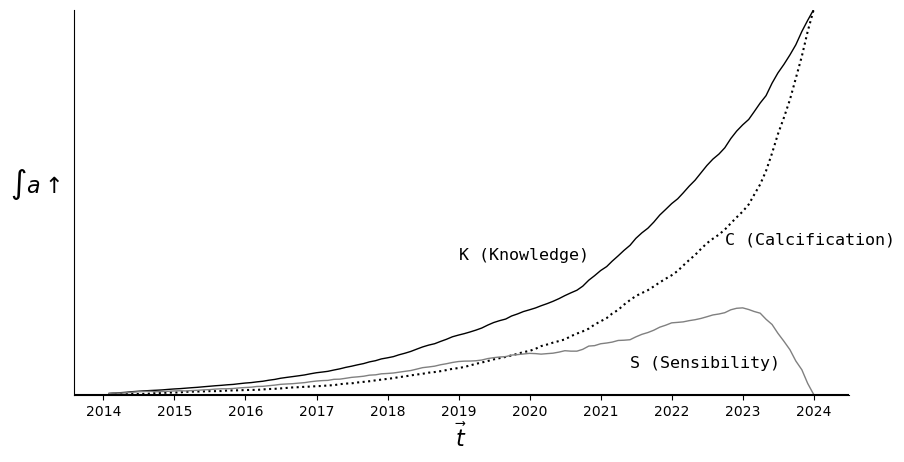

In [24]:
# Calculations for K, C, and S with normalization
K = raw_K * (1 / raw_K[-1])
C = raw_C * (1 / raw_C[-1])
S = K - C

# Create an array of dates from January 2014 to December 2023
dates = pd.date_range(start="2014-01-01", end="2024-01-01", freq='M')

# Create the plot
plt.figure(figsize=(10, 5))  # Adjust the size of the plot as needed
plt.plot(dates, K, color='black', linewidth=1)        
plt.plot(dates, C, color='black', linestyle='dotted')
plt.plot(dates, S, color='gray',  linewidth=1)

# Add X and Y axis in black
plt.axhline(y=0, color='black')  # Y-axis

# Remove Y-axis ticks and labels
plt.yticks([])

# Remove the top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Keep the bottom and left borders (x and y axes)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.gca().set_ylim(bottom=min(0, min(K.min(), C.min(), S.min())), top=max(K.max(), C.max(), S.max()))

# Add an axis label 't' as a vector in italic
plt.xlabel(r'$\vec{t}$', fontsize=16)  # Using LaTeX for vector notation
plt.ylabel(r'$\int a \uparrow$', fontsize=16, rotation=0)  # Using LaTeX for integral and vector notation
plt.gca().yaxis.set_label_coords(-0.05, 0.5)

# Adding legend on top of the chart with some magic numbers
plt.text(pd.to_datetime("2020-11-01"), 0.35, 'K (Knowledge)',     fontfamily='monospace', fontsize='large', horizontalalignment='right')
plt.text(pd.to_datetime("2022-10-01"), 0.39, 'C (Calcification)', fontfamily='monospace', fontsize='large', horizontalalignment='left')
plt.text(pd.to_datetime("2021-06-01"), 0.07, 'S (Sensibility)',   fontfamily='monospace', fontsize='large', horizontalalignment='left')

# Show the plot
plt.show()